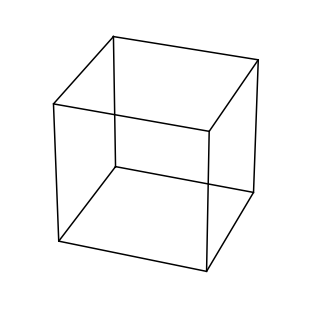

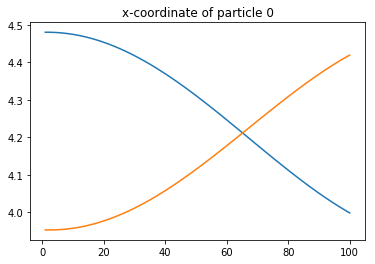

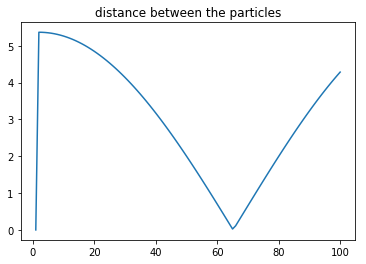

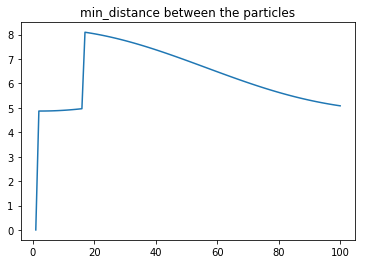

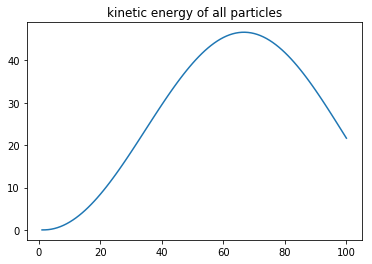

In [12]:

import numpy as np
import matplotlib.pyplot as plt

from anim import make_3d_animation

# Physical values are defined globally
dim = 3
L = 10 # length of box
m = 1 # mass of particles


def build_matrices(n_timesteps, n_particles):
    vel = np.zeros(shape=(Nt, N_particle, dim), dtype=float)
    pos = np.zeros(shape=(Nt, N_particle, dim), dtype=float)
    F = np.zeros(shape=(Nt, N_particle, dim), dtype=float)
    dis = np.zeros(Nt)
    return(vel,pos,F,dis)


def initial_state(N_particles, vel,pos):
    #vel[0] = np.random.rand(N_particles, dim) * L
    pos[0] = np.random.rand(N_particles, dim) * L
    
    return(vel,pos)

def calculate_time_evolution(Nt, N_particle, vel, pos, dis, F):

    # distance = squareroot((dx)^2 + (dy)^2 + (dz)^2)
    #dis[0] = (sum((pos[0,0,:] - pos[0,1,:])**2))**0.5 
    #if dis[0] > L/2:
    
    # min_dis is the minimum distance between particle 0 and particle 1 in a periodic box
    min_dis = np.zeros(Nt)
    
    # xj, yj and zj are the coordinates of the particle which is the closest to particle 0.
    xj = np.zeros(Nt)
    yj = np.zeros(Nt)
    zj = np.zeros(Nt)
    rj = np.zeros([Nt,dim])
    
   
    direction = np.zeros((N_particle, dim))
    direction[0,:] = - (pos[0,0,:] - pos[0,1,:])
    
    # minus sign for attractive forces                                       
    #direction[1,:] = -(pos[0,1,:] - pos[0,0,:])

    F[0,0] = 3 * direction[0,:]
    F[0,1] = 3 * direction[1,:]
    

    for v in range(1,Nt):        
        pos[v] = (pos[v-1]+(1/Nt)*vel[v-1]) % L

        # velocity = vel[t-1] + 1/m * h * F[t-1]  p
        vel[v,:,:] = vel[v-1,:,:]+(1/m)*(1/Nt)*F[v-1,:,:]

        # direction of the line drawn between particles along which the force 
        # acts. For each particle a seperate direction vector is calculated.
        # the direction vector is not saved for different timesteps. 
        direction[0,:] = -(pos[v-1,0,:] - pos[v-1,1,:]) 
        # minus sign for attractive forces
        direction[1,:] = -(pos[v-1,1,:] - pos[v-1,0,:])

        # force along the line between particles
        F[v,0] = 3 * direction[0,:]
        F[v,1] = 3 * direction[1,:]

        # distance = squareroot((dx)^2 + (dy)^2 + (dz)^2) 
        dis[v] = (sum((pos[v,0,:] - pos[v,1,:])**2))**0.5
        
        # minimum distance between particle 0 and the 9 surrounding particles defined by particle 1.
        # xj, yj, zj give the coordinates of the particle which is closest to particle 0.
        xj[v] = (pos[v,0,0] - pos[v,1,0] + L/2) % L - L/2
        yj[v] = (pos[v,0,1] - pos[v,1,1] + L/2) % L - L/2
        zj[v] = (pos[v,0,2] - pos[v,1,2] + L/2) % L - L/2
        rj = np.transpose(np.array([xj, yj, zj]))
        
        min_dis[v] = (np.sum((pos[v,0,:]-rj[v,:])**2))**0.5
            
    return(vel,pos,dis, min_dis)


def calculate_kinetic_energy(n_timesteps, vel):
    # for each particle the kinetic energy is:
    # E_{kin} = 0.5 m (v_x^2 + v_y^2 + v_z^2)
    # the total kinetic energy is the sum of all particles
    kinetic_energy = 0.5 * m * (np.sum(vel[:,0,:]**2, axis=1) + np.sum(vel[:,1,:]**2, axis=1))
    return(kinetic_energy)


if __name__ == "__main__":    
    N_particle = 2
    Nt = 100 # number of timesteps  
    time = np.linspace(1,Nt,Nt)

    vel,pos,F,dis = build_matrices(Nt, N_particle)
    vel,pos = initial_state(N_particle,vel,pos)
    vel,pos,dis,min_dis = calculate_time_evolution(Nt, N_particle, vel, pos, dis,F)    
    kin_energy = calculate_kinetic_energy(Nt,vel)
    
    anim = make_3d_animation(L, pos, delay=30, rotate_on_play=0)

    plt.figure()
    # plots the x-cordinate of particle 0 
    plt.plot(time,pos[:,:,0])
    plt.title('x-coordinate of particle 0')

    # plots the distance between the particles
    plt.figure()
    plt.plot(time,dis)
    plt.title('distance between the particles')
    
    # plots the min_distance between the particles
    plt.figure()
    plt.plot(time,min_dis)
    plt.title('min_distance between the particles')
    

    plt.figure()
    plt.plot(time,kin_energy)
    plt.title('kinetic energy of all particles')
    plt.show()




In [166]:
dim = 3
min_dir = np.zeros(4)
xj = np.zeros(4)
yj = np.zeros(4)
zj = np.zeros(4)
rj = np.zeros(4)
pos = np.random.rand(4,2,3)



for v in range(0,4):
    xj[v] = (pos[v,0,0] - pos[v,1,0] + L/2) % L - L/2
    yj[v] = (pos[v,0,1] - pos[v,1,1] + L/2) % L - L/2
    zj[v] = (pos[v,0,2] - pos[v,1,2] + L/2) % L - L/2
    rj = np.transpose(np.array([xj, yj, zj]))
    
    min_dir[v] = (np.sum((pos[v,0,:]-rj[v,:])**0.5))**0.5
    



    


   


[ 0.4475753   0.53998727 -0.56636179]
